In [ ]:
from google.colab import drive

# Montamos nuestra unidad drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from matplotlib import image
from shutil import copyfile, copytree
import cv2
import seaborn as sns
import random

import PIL
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
srcPath = '/content/drive/MyDrive/bsd_images/images'
dstPath1 = '/content/drive/MyDrive/bsd_images/noisy_images_1'
dstPath2 = '/content/drive/MyDrive/bsd_images/noisy_images_2'

copytree(srcPath, dstPath1)
copytree(srcPath, dstPath2)

'/content/drive/MyDrive/bsd_images/noisy_images_2'

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K
import tensorflow as tf

tf.random.set_seed(0)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
def normalize_scan(image):

  norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

  return norm_image

def resize_scan(scan, desired_width, desired_height):
  
  scan = cv2.resize(scan, (desired_height, desired_width))

  return scan

def preprocess_scan(path, width, height):
  
  scan = cv2.imread(path)  
  resized_scan = resize_scan(scan, width, height)  
  normalized_resized_scan = normalize_scan(resized_scan)

  return normalized_resized_scan

def generate_img(image): 
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()
def generate_img_2(image): 
  img = plt.imshow(image)
  # img.set_cmap('hot')
  plt.axis('off')
  # plt.show()

In [ ]:
width = 256
height = 256

In [ ]:
def noisy(noise_typ,image):
  if noise_typ == "gauss":
    row,col,ch= image.shape
    mean = 0
    var = 0.01
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy
  
  elif noise_typ == "s&p":
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.004
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
    out[coords] = 0
    return out
  
  elif noise_typ == "poisson":
    vals = len(np.unique(image))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(image * vals) / float(vals)
    return noisy
  
  elif noise_typ =="speckle":
    row,col,ch = image.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch)        
    noisy = image + image * gauss
    return noisy

    ##Added new
  elif noise_typ == "bernoulli":
    N = 100
    P = 0.5
    bernoulli = np.random.binomial(n = N, p = P, size = image.shape)
    noisy = bernoulli + image
    return noisy

In [ ]:
cleanPath = '/content/drive/MyDrive/bsd_images/images'

clean_train_path = os.path.join(cleanPath, 'train')
clean_test_path = os.path.join(cleanPath, 'test')

In [ ]:
noisyPath1 = '/content/drive/MyDrive/bsd_images/noisy_images_1'

noisy_train_path_1 = os.path.join(noisyPath1, 'train')
noisy_test_path_1 = os.path.join(noisyPath1, 'test')

In [ ]:
noisyPath2 = '/content/drive/MyDrive/bsd_images/noisy_images_2'

noisy_train_path_2 = os.path.join(noisyPath2, 'train')
noisy_test_path_2 = os.path.join(noisyPath2, 'test')

In [ ]:
os.chdir(clean_train_path)
clean_train_files = os.listdir(clean_train_path)

for im in clean_train_files:
  img = preprocess_scan(im, width, height)
  noise = noisy("gauss", img)
  os.chdir(noisy_train_path_1)
  cv2.imwrite(im, 255 * noise)
  os.chdir(clean_train_path)

os.chdir(clean_test_path)
clean_test_files = os.listdir(clean_test_path)

for im in clean_test_files:
  img = preprocess_scan(im, width, height)
  noise = noisy("gauss", img)
  os.chdir(noisy_test_path_1)
  cv2.imwrite(im, 255 * noise)
  os.chdir(clean_test_path)

In [ ]:
# os.chdir(clean_train_path)
# clean_train_files = os.listdir(clean_train_path)
# train_gaussian_noise_images_1 = []
# for im in clean_train_files:
#   img = preprocess_scan(im, width, height)
#   noise = noisy("gauss", img)
#   train_gaussian_noise_images_1.append(noise)
#   # os.chdir(noisy_train_path_1)
#   # cv2.imwrite(im, 255 * noise)
#   # os.chdir(clean_train_path)

# os.chdir(clean_test_path)
# clean_test_files = os.listdir(clean_test_path)
# test_gaussian_noise_images_1 = []
# for im in clean_test_files:
#   img = preprocess_scan(im, width, height)
#   noise = noisy("gauss", img)
#   test_gaussian_noise_images_1.append(noise)
#   # os.chdir(noisy_test_path_1)
#   # cv2.imwrite(im, 255 * noise)
#   # os.chdir(clean_test_path)

In [ ]:
os.chdir(clean_train_path)
clean_train_files = os.listdir(clean_train_path)

for im in clean_train_files:
  img = preprocess_scan(im, width, height)
  noise = noisy("gauss", img)
  os.chdir(noisy_train_path_2)
  cv2.imwrite(im, 255 * noise)
  os.chdir(clean_train_path)

os.chdir(clean_test_path)
clean_test_files = os.listdir(clean_test_path)

for im in clean_test_files:
  img = preprocess_scan(im, width, height)
  noise = noisy("gauss", img)
  os.chdir(noisy_test_path_2)
  cv2.imwrite(im, 255 * noise)
  os.chdir(clean_test_path)

In [ ]:
# image = train_scans[0]
# noisyimg = noisy('gauss', image)
# generate_img(noisyimg.astype('float32'))

In [ ]:
os.listdir(noisy_train_path_1);

In [ ]:
os.chdir(clean_train_path)
clean_images = np.array([preprocess_scan(x, width, height) for x in os.listdir(clean_train_path)])

In [ ]:
os.chdir(noisy_train_path_1)
# train_gaussian_noise_images_1 = np.array([cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in os.listdir(noisy_train_path_1)])
train_gaussian_noise_images_1 = np.array([preprocess_scan(x, width, height) for x in os.listdir(noisy_train_path_1)])

In [ ]:
os.chdir(noisy_train_path_2)
train_gaussian_noise_images_2 = np.array([preprocess_scan(x, width, height) for x in os.listdir(noisy_train_path_2)])

In [ ]:
os.chdir(clean_test_path)
clean_images_test = np.array([preprocess_scan(x, width, height) for x in os.listdir(clean_test_path)])

In [ ]:
os.chdir(noisy_test_path_1)
test_gaussian_noise_images_1 = np.array([preprocess_scan(x, width, height) for x in os.listdir(noisy_test_path_1)])

In [ ]:
os.chdir(noisy_test_path_2)
test_gaussian_noise_images_2 = np.array([preprocess_scan(x, width, height) for x in os.listdir(noisy_test_path_2)])

In [ ]:
# Funcion de perdida - MSE
from tensorflow.keras.losses import MeanSquaredError

mse = tf.keras.losses.MeanSquaredError()
# mse(train_gaussian_noise_images[0], train_scans[0]).numpy()

In [ ]:
# Batch size
BATCH_SIZE = 10

# Train size
train_gaussian_noise_images_1.shape

(201, 256, 256, 3)

In [ ]:
from keras import Input, Model, Sequential
from keras import layers
from keras import backend as K
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomContrast, RandomRotation

K.clear_session()

In [ ]:
data_augmentation = Sequential(
    [
     RandomFlip(mode="horizontal",seed=0),
     RandomContrast(0.1,seed=0)     
     ]
)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Add
def REDNet():

    il = Input(shape = (256, 256, 3))
    augmentation = data_augmentation(il)
    l1 = Conv2D(16, (3, 3), padding = 'same', activation = 'relu', )(augmentation)
    l2 = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(l1)
    l3 = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(l2)
    l4 = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(l3)
    l5 = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(l4)  
    l6 = Conv2DTranspose(16, (3, 3), padding = 'same', activation = 'relu')(l5)
    s1 = Add()([l6, l4])
    l7 = Conv2DTranspose(16, (3, 3), padding = 'same', activation = 'relu')(s1)
    s2 = Add()([l7, l3])
    l8 = Conv2DTranspose(16, (3, 3), padding = 'same', activation = 'relu')(s2)
    s3 = Add()([l8, l2])
    l9 = Conv2DTranspose(16, (3, 3), padding = 'same', activation = 'relu')(s3)
    s4 = Add()([l9, l1])
    l10 = Conv2DTranspose(3, (3, 3), padding = 'same', activation = 'relu')(s4)
  
    model = Model(il, l10)
    return model

In [ ]:
autoencoder = REDNet()

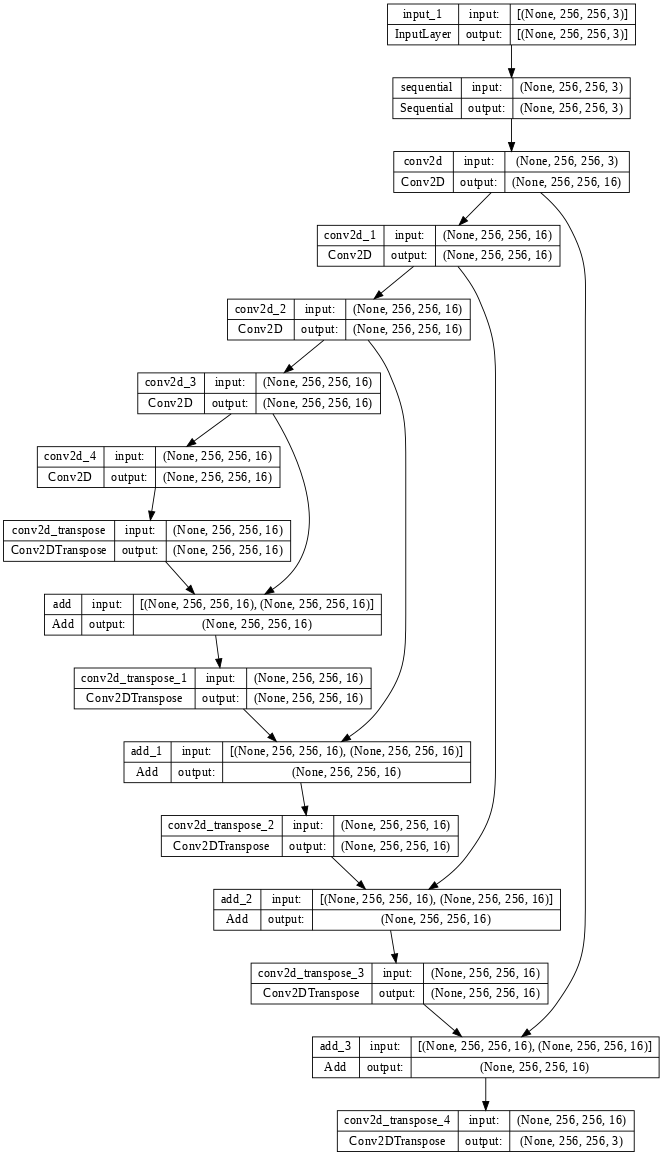

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, dpi=64)

In [ ]:
%cd /content/drive/My Drive/TA_02_TAC

[Errno 2] No such file or directory: '/content/drive/My Drive/TA_02_TAC'
/content


In [ ]:
from tensorflow.keras.optimizers import Adam

# Definimos la funcion de optimizacion
autoencoder_optimizer = Adam(0.0001, beta_1=0.9)

In [ ]:
autoencoder.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "my_model/model_gauss_10"

monitor = "val_accuracy"

mode = "max"

model_checkpoint = ModelCheckpoint(checkpoint_path, monitor=monitor, verbose=1, save_best_only=True, save_weights_only=True, mode=mode)

In [ ]:
EPOCHS = 40
history = autoencoder.fit(train_gaussian_noise_images_1, train_gaussian_noise_images_2,
                epochs=EPOCHS,
                shuffle=True,
                validation_data=(test_gaussian_noise_images_1, test_gaussian_noise_images_2), callbacks=[model_checkpoint])

# history = autoencoder.fit(train_gaussian_noise_images_1, train_gaussian_noise_images_2,
#                 epochs=EPOCHS,
#                 shuffle=True,
#                 callbacks=[model_checkpoint])

Epoch 1/40


7/7 [==============================] - ETA: 0s - loss: 0.1337 - accuracy: 0.4020
Epoch 1: val_accuracy improved from -inf to 0.37906, saving model to my_model/model_gauss_10
7/7 [==============================] - 9s 584ms/step - loss: 0.1337 - accuracy: 0.4020 - val_loss: 0.0743 - val_accuracy: 0.3791
Epoch 2/40
7/7 [==============================] - ETA: 0s - loss: 0.0731 - accuracy: 0.3921
Epoch 2: val_accuracy did not improve from 0.37906
7/7 [==============================] - 3s 425ms/step - loss: 0.0731 - accuracy: 0.3921 - val_loss: 0.0245 - val_accuracy: 0.3675
Epoch 3/40
7/7 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.4124
Epoch 3: val_accuracy improved from 0.37906 to 0.56616, saving model to my_model/model_gauss_10
7/7 [==============================] - 3s 434ms/step - loss: 0.0445 - accuracy: 0.4124 - val_loss: 0.0229 - val_accuracy: 0.5662
Epoch 4/40
7/7 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.5275
Epoch 4: val_acc

In [ ]:
def show_results(log):
  val_loss = log.history['val_loss']
  val_acc = log.history['val_accuracy']
      
  fig, axes = plt.subplots(1, 2, figsize=(14,4))
  ax1, ax2 = axes
  ax1.plot(log.history['loss'], label='train')
  ax1.plot(val_loss, label='test')
  ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
  ax2.plot(log.history['accuracy'], label='train')
  ax2.plot(val_acc, label='test')
  ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
  for ax in axes: ax.legend()

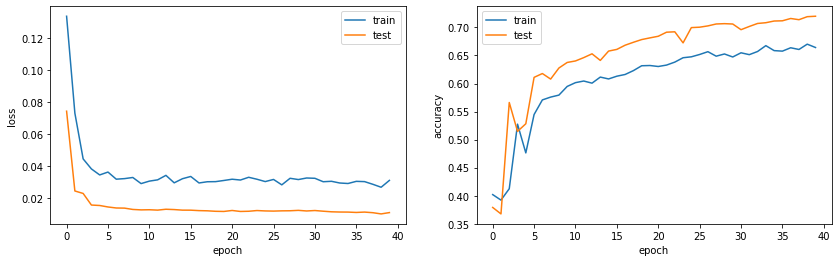

In [ ]:
show_results(history)

In [ ]:
def generate_images(model, test_input, tar):
  prediction = model.predict(test_input.reshape(-1,256,256,3))
  plt.figure(figsize=(15, 15))

  display_list = [test_input.astype('float32'), tar.astype('float32'), prediction.reshape(256,256,3)]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])

    plt.axis("off")
    plt.imshow(cv2.cvtColor(display_list[i], cv2.COLOR_BGR2RGB))
    # img = plt.imshow(tf.cast((display_list[i] * 255),np.uint8))
    # # img.set_cmap('hot')
    # plt.axis('off')
    # print("OK 3")
    # plt.imshow(display_list[i])
    # plt.axis('off')

  plt.show()

In [ ]:
zip(test_gaussian_noise_images_1[:5], clean_images_test[:5])

In [ ]:
## Visualizamos algunas prediccinoes
for inp, tar in zip(test_gaussian_noise_images_1[:5], clean_images_test[:5]):
  generate_images(autoencoder, inp, tar)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def plot_comparison(input_image, target_image, prediction):
    plt.figure(figsize=(15, 15))

    display_list = [input_image.astype('float32'), target_image.astype('float32'), prediction.astype('float32')]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      plt.axis("off")
      plt.imshow(cv2.cvtColor(display_list[i], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# Realizamos predicciones a las imagenes de testing y obtenemos el PSNR
list_test_predictions = []
list_PSNR = []
for inp, tar in zip(test_gaussian_noise_images_1, clean_images_test):
    prediction = autoencoder.predict(inp.reshape(-1,256,256,3))
    prediction = prediction.reshape(256,256,3)
    list_test_predictions.append(prediction)
    list_PSNR.append(PSNR(tar, prediction))

1/1 [==============================] - 0s 22ms/step


In [ ]:
np.array([100 - x for x in list_PSNR]).mean()

30.23907279243086

In [ ]:
# TOP 5 RESULTADOS
for index in np.array(list_PSNR).argsort()[-5:]:
  plot_comparison(test_gaussian_noise_images_1[index], clean_images_test[index], list_test_predictions[index])

Output hidden; open in https://colab.research.google.com to view.